In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [5]:
df = pd.read_excel("Amazon 2_Raw.xlsx")

df.head()


,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [13]:
df.isnull()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3198,False,False,False,False,False,False,False,False,False,False
3199,False,False,False,False,False,False,False,False,False,False
3200,False,False,False,False,False,False,False,False,False,False
3201,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [19]:
print(df.dtypes)


Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
EmailID                 object
Geography               object
Category                object
Product Name            object
Sales                  float64
Quantity                 int64
Profit                 float64
dtype: object


In [20]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)


In [21]:
print(df.columns)  # Ensure 'Month' is now in the list


Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit', 'Month'],
      dtype='object')


In [23]:
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
monthly_sales

,Month,Sales
0,2011-01,2648.0570
1,2011-02,1348.6220
2,2011-03,11008.8980
3,2011-04,9343.4870
4,2011-05,6570.4380
5,2011-06,9629.4220
6,2011-07,21808.5530
7,2011-08,13248.2310
8,2011-09,14900.5370
9,2011-10,8728.7580


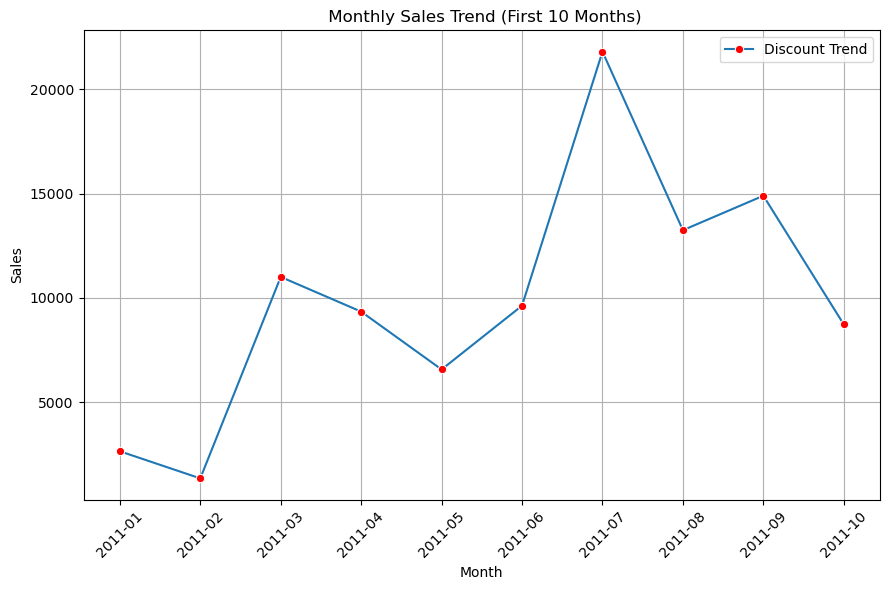

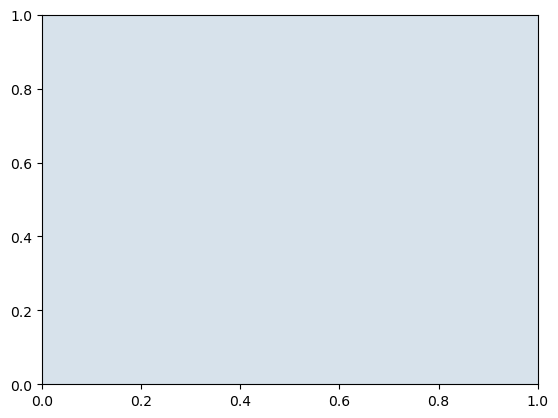

In [38]:

data_to_plot = monthly_sales.head(10)

plt.figure(figsize=(9,6))
sns.lineplot(data=data_to_plot, x="Month", y="Sales", marker="o",label="Discount Trend",markerfacecolor='red')
plt.title(" Monthly Sales Trend (First 10 Months)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_26108\171901989.py:8: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  plt.tight_layout()
C:\Users\Hp\anaconda3\sm\sureshpujariA\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


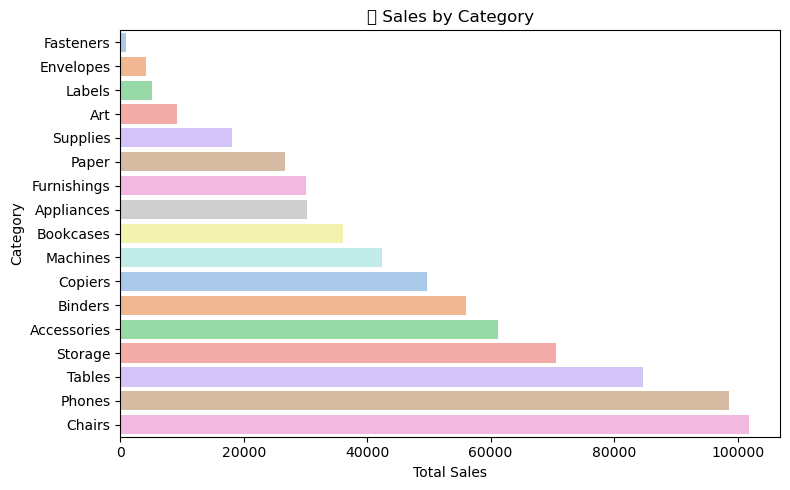

In [40]:
cat_sales = df.groupby("Category")["Sales"].sum().sort_values().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cat_sales, x="Sales", y="Category", palette="pastel",)
plt.title(" Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_26108\3082582243.py:9: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\Users\Hp\anaconda3\sm\sureshpujariA\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


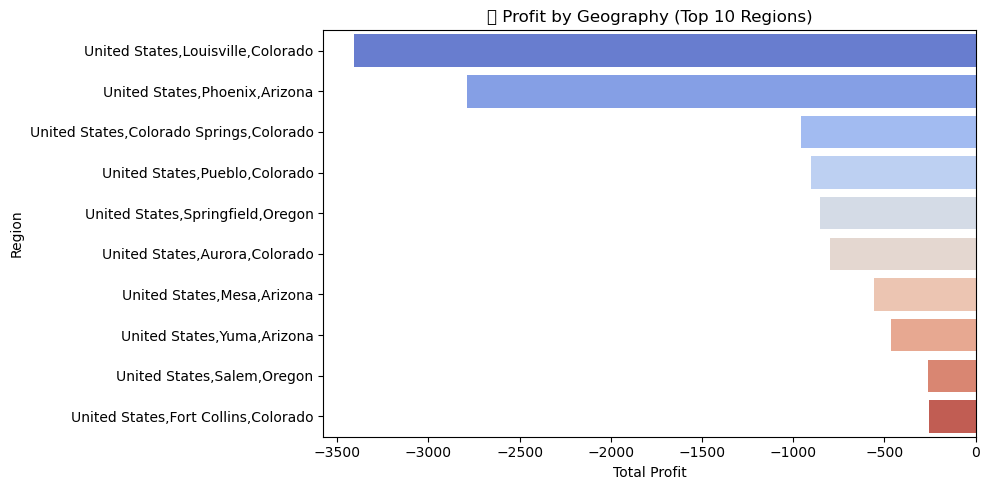

In [44]:
# Top 10 regions (if more than 10 exist)
geo_profit_top10 = geo_profit.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=geo_profit_top10, x="Profit", y="Geography", palette="coolwarm")
plt.title("🌍 Profit by Geography (Top 10 Regions)")
plt.xlabel("Total Profit")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_26108\280212310.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\Hp\anaconda3\sm\sureshpujariA\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


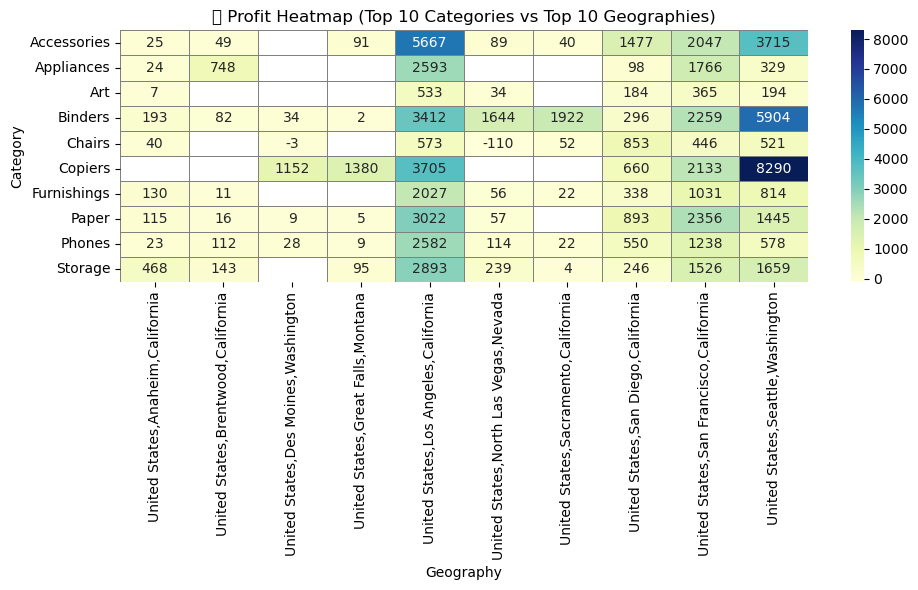

In [48]:
# Top 10 Categories by Profit
top_categories = df.groupby("Category")["Profit"].sum().sort_values(ascending=False).head(10).index

# Top 10 Geographies by Profit
top_geographies = df.groupby("Geography")["Profit"].sum().sort_values(ascending=False).head(10).index

# Filter DataFrame for both top categories and geographies
df_top = df[df["Category"].isin(top_categories) & df["Geography"].isin(top_geographies)]

# Create pivot table
pivot = df_top.pivot_table(index="Category", columns="Geography", values="Profit", aggfunc="sum")

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=0.5, linecolor='gray')
plt.title("🔥 Profit Heatmap (Top 10 Categories vs Top 10 Geographies)")
plt.tight_layout()
plt.show()


C:\Users\Hp\anaconda3\sm\sureshpujariA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\AppData\Local\Temp\ipykernel_26108\1466353799.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Hp\anaconda3\sm\sureshpujariA\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


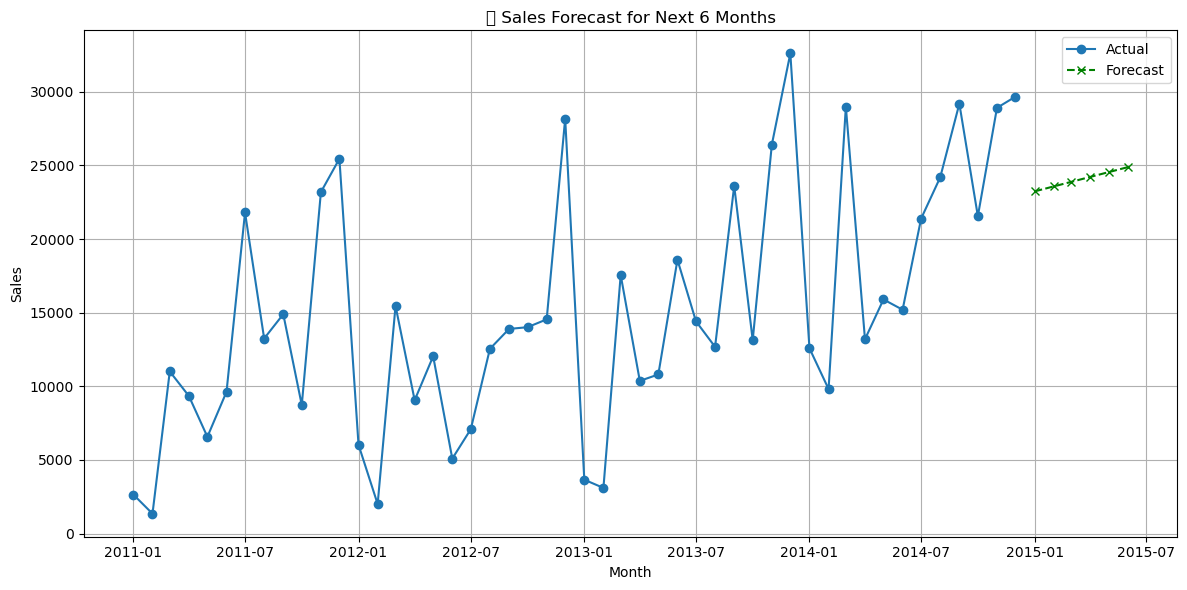

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
monthly_sales["Month_dt"] = pd.to_datetime(monthly_sales["Month"])
monthly_sales["Month_num"] = monthly_sales["Month_dt"].map(pd.Timestamp.toordinal)

X = monthly_sales[["Month_num"]]
y = monthly_sales["Sales"]

model = LinearRegression()
model.fit(X, y)

# Predict next 6 months
future_months = pd.date_range(start=monthly_sales["Month_dt"].max(), periods=7, freq='MS')[1:]
future_nums = future_months.map(pd.Timestamp.toordinal).values.reshape(-1,1)
future_preds = model.predict(future_nums)

# Plot actual + forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Month_dt"], monthly_sales["Sales"], label="Actual", marker='o')
plt.plot(future_months, future_preds, label="Forecast", linestyle="--", marker='x', color='green')
plt.title("📊 Sales Forecast for Next 6 Months")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
